In [1]:
# Découpage du jeu de données en fold (k)

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
wineSet = pd.read_csv("../DataSet/winequality-white.csv", delimiter=";", decimal=".")

In [3]:
wineSet

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
### Check the columns
wineSet.shape

(4898, 12)

In [5]:
#on garde toutes les colonnes sauf la dernière pour X 
# on passe les colonnes concernées en array numpy 

X = wineSet[wineSet.columns[:-1]].values
X.shape

(4898, 11)

In [6]:
y = wineSet['quality'].values
y.shape

(4898,)

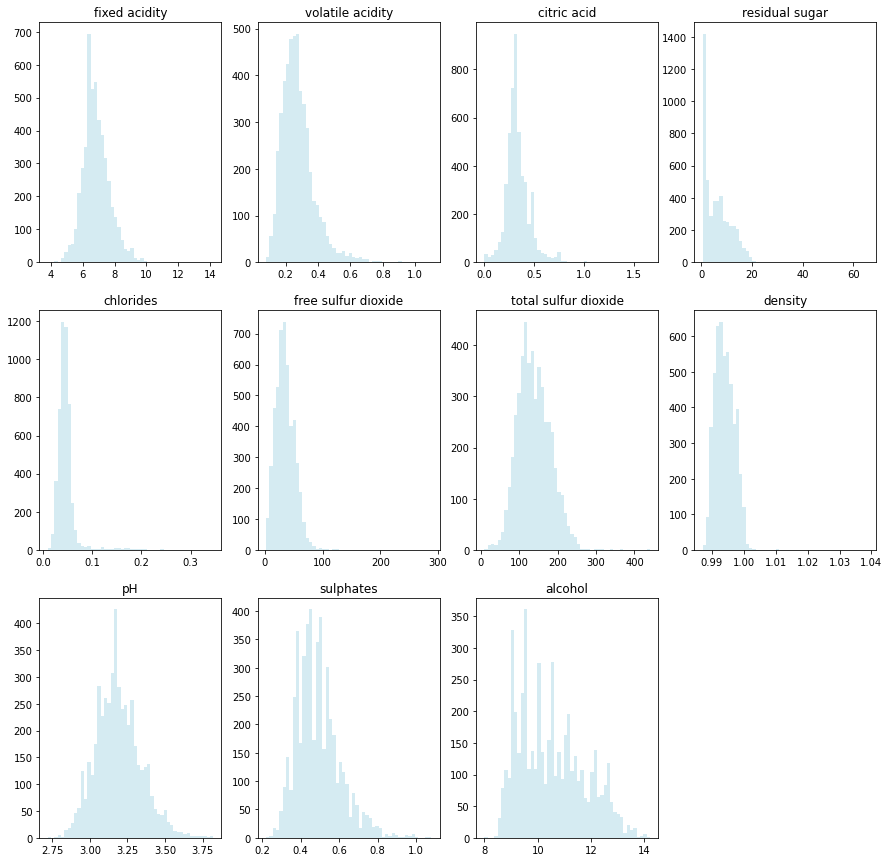

In [7]:
##add subplots to the section 
hist = plt.figure(figsize=(15, 15))
columnList = list(wineSet.columns.values)[:-1]
#fig, (ax1, ax2) = plt.subplots(2, 1)
for columnKey in range(len(columnList)): 
    ax = hist.add_subplot(3, 4, (columnKey+1))
    column = columnList[columnKey]
    ndValues = wineSet[wineSet.columns.values[columnKey]].values
    ax.hist(ndValues , label=str(wineSet.columns.values[columnKey]),  bins=50, color='lightblue', alpha=0.5)
    ax.set_title(str(wineSet.columns.values[columnKey]))
    #g = wineSet[column].plot.hist(label=column, figsize=(10,10), color='lightblue', alpha=0.5, bins=50, density=True)
    #plt.show()

In [9]:
#separation des bons vins de moins bons. 
# si les valeurs sont < 6 elles seront remplacées par 0 sinon 1 
y_class = np.where(y<6, 0, 1)

In [10]:
y_class


array([1, 1, 1, ..., 1, 1, 1])

In [11]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_class, test_size=0.3)

In [12]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
#mettre les valeurs sur un ordre de grandeur similaire. 
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [13]:
#todo faire la même chose en passant par pandas puis values et numpy pour le filtre. 

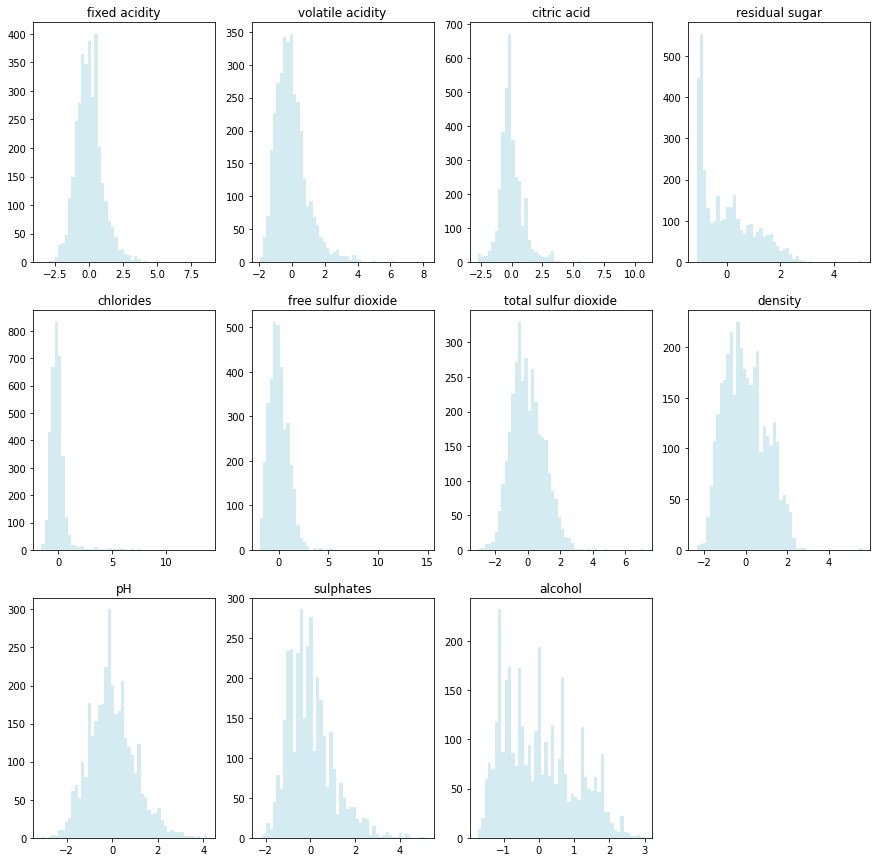

In [14]:
hist = plt.figure(figsize=(15, 15))
for columnIndex in range(X_train_std.shape[1]):
    #print(columnIndex)
    #print(wineSet.columns.values[columnIndex])
    #figsize(10, 10))
    adjustedColumnIndex = int((columnIndex+1)/3)
    ax = hist.add_subplot(3, 4, (columnIndex+1))#, adjustedColumnIndex+1)

    ax.hist(X_train_std[:, columnIndex], label=str(wineSet.columns.values[columnIndex]),  bins=50, color='lightblue', alpha=0.5)
    ax.set_title(str(wineSet.columns.values[columnIndex]))

In [15]:
from sklearn import neighbors, metrics
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 3}
Résultats de la validation croisée :
accuracy = 0.760 (+/-0.037) for {'n_neighbors': 3}
accuracy = 0.750 (+/-0.038) for {'n_neighbors': 5}
accuracy = 0.753 (+/-0.025) for {'n_neighbors': 7}
accuracy = 0.759 (+/-0.024) for {'n_neighbors': 9}
accuracy = 0.759 (+/-0.024) for {'n_neighbors': 11}
accuracy = 0.758 (+/-0.034) for {'n_neighbors': 13}
accuracy = 0.757 (+/-0.030) for {'n_neighbors': 15}


In [16]:
y_pred = clf.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))


Sur le jeu de test : 0.767


In [17]:
y_pred = clf.predict(X_test_std)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))



Sur le jeu de test : 0.767


In [18]:
wineSet

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [9]:
#replace without getting out of pandas but still using numpy 
wineSet["wineQuality"] = np.where(wineSet["quality"] < 6, 0, 1)

In [10]:
yPD = wineSet["wineQuality"].values
#keep all the columns but the two latest since we created an extra column
XPD = wineSet[wineSet.columns[:-2]].values

In [11]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(XPD, yPD, test_size=0.3)

In [12]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
#mettre les valeurs sur un ordre de grandeur similaire. 
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

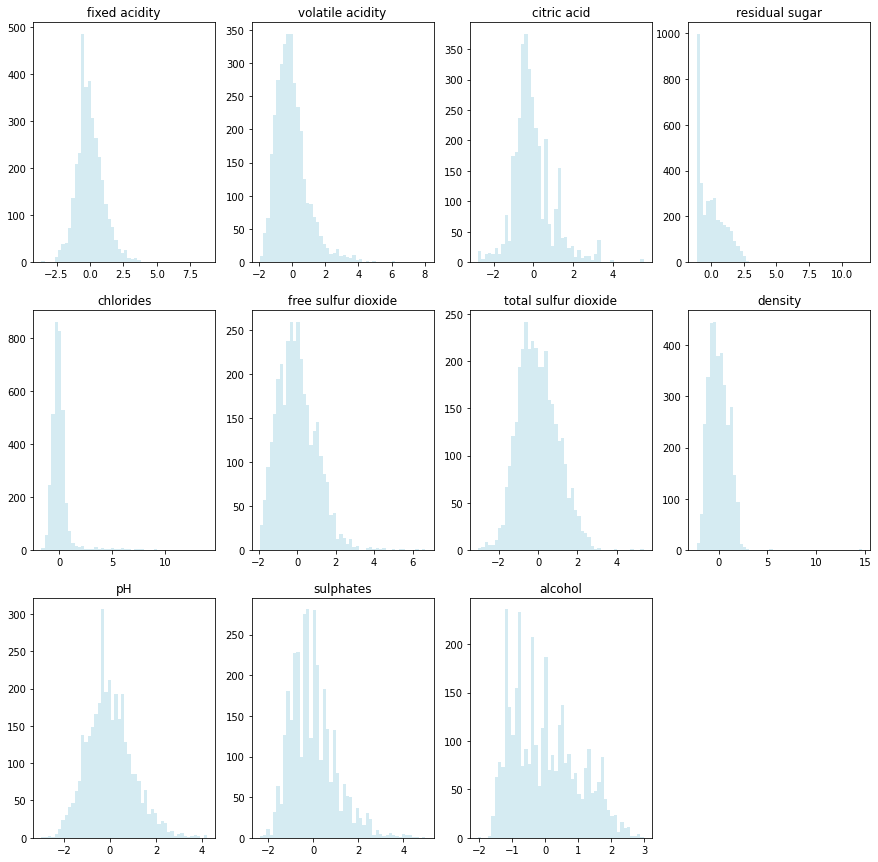

In [13]:
hist = plt.figure(figsize=(15, 15))
#add y 
# titre précision
for columnIndex in range(X_train_std.shape[1]):
    #print(columnIndex)
    #print(wineSet.columns.values[columnIndex])
    #figsize(10, 10))
    adjustedColumnIndex = int((columnIndex+1)/3)
    ax = hist.add_subplot(3, 4, (columnIndex+1))#, adjustedColumnIndex+1)

    ax.hist(X_train_std[:, columnIndex], label=str(wineSet.columns.values[columnIndex]),  bins=50, color='lightblue', alpha=0.5)
    ax.set_title(str(wineSet.columns.values[columnIndex]))

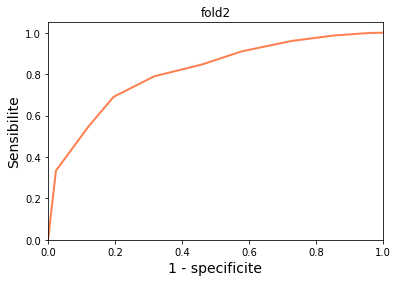

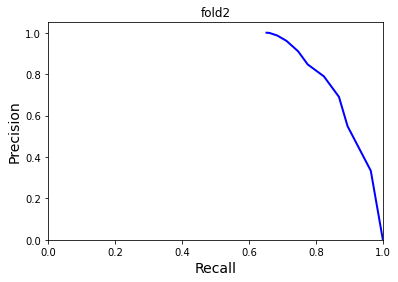

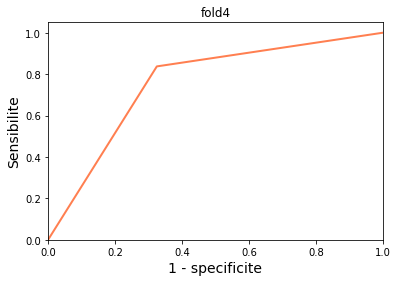

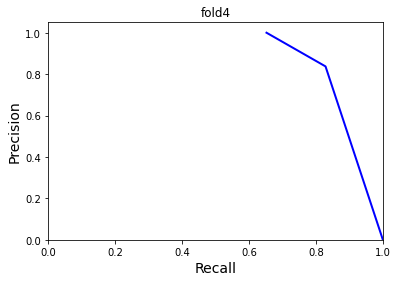

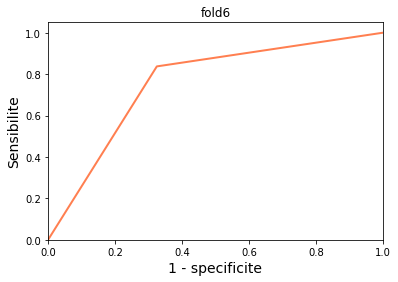

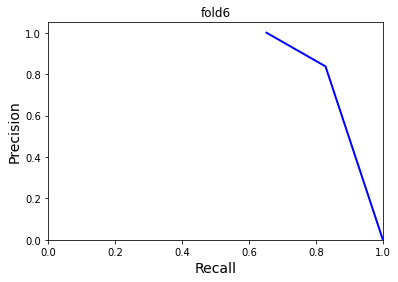

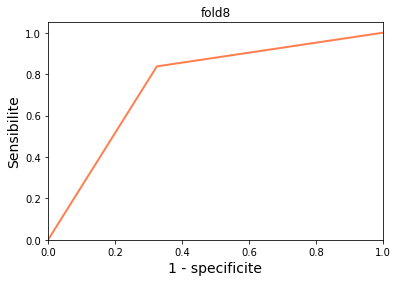

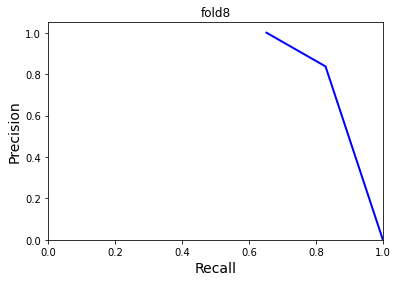

(20, 16)


In [22]:
from sklearn import neighbors, metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve
# Fixer les valeurs des hyperparamètres à tester de 1 à 20 
param_grid = {'n_neighbors':list(range(1,10, 2))}
results = pd.DataFrame(columns=["fold", "recall", "precision", "specificity","fmeasure", 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
test_score = []
for fold in range(2,10, 2): 
    # Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
    score = 'accuracy'
    
    # Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
    clf = model_selection.GridSearchCV(
        neighbors.KNeighborsClassifier(), # un classifieur kNN
        param_grid,     # hyperparamètres à tester
        cv=fold,           # nombre de folds de validation croisée
        scoring=score   # score à optimiser
    )

    # Optimiser ce classifieur sur le jeu d'entraînement
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    specificity = tn/(fp+tn)
    fmeasure = 2*tp/(2*tp+fp+fn)
    
    
    #for roc curve
    Y_pred_proba = clf.predict_proba(X_test_std)[:,1]
    [fpr, tpr, thr] = metrics.roc_curve(y_test, Y_pred_proba)
    plt.plot(fpr, tpr, color='coral', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1 - specificite', fontsize=14)
    plt.ylabel('Sensibilite', fontsize=14)
    plt.title(("fold" + str(fold)))
    plt.show()
    
    #for precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, Y_pred_proba)
    plt.plot(precision, recall, color='blue', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title(("fold" + str(fold)))
    plt.show()
    
    
    
    test_score.append(metrics.accuracy_score(y_test, y_pred))

    subFrame = pd.DataFrame(columns=["fold", "recall", "precision", "specificity", "fmeasure", 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
    #on populated le dataframe de resultats avec chacune des clés du dictionnaire contenues dans cv_results 
    for column in subFrame.columns[6:].values: 
        subFrame[column] = clf.cv_results_[column]
    #on genere autant de fold que le nombre de rows du dataframe actuel
    subFrame["fold"] = [fold] * subFrame.shape[0]
    subFrame["recall"] = [recall] * subFrame.shape[0]
    subFrame["precision"] = [precision] * subFrame.shape[0]
    subFrame["specificity"] = [specificity] * subFrame.shape[0]
    #subFrame["test_score"] = [test_score] * subFrame.shape[0]
    #print(subFrame)
    results = results.append(subFrame)
print(results.shape)

In [15]:
results

,fold,recall,precision,specificity,fmeasure,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,2,"[1.0, 0.9968717413972888, 0.9906152241918665, ...","[0.6555023923444976, 0.6602209944751382, 0.670...",0.585127,NaN,NaN,0.000181,0.064693,0.005023,1,{'n_neighbors': 1},0.751459,0.757876,0.754667,0.003209,13
1,2,"[1.0, 0.9968717413972888, 0.9906152241918665, ...","[0.6555023923444976, 0.6602209944751382, 0.670...",0.585127,NaN,NaN,0.000055,0.064815,0.001476,2,{'n_neighbors': 2},0.710618,0.714702,0.712660,0.002042,19
2,2,"[1.0, 0.9968717413972888, 0.9906152241918665, ...","[0.6555023923444976, 0.6602209944751382, 0.670...",0.585127,NaN,NaN,0.000004,0.066104,0.001832,3,{'n_neighbors': 3},0.744457,0.746791,0.745624,0.001167,17
3,2,"[1.0, 0.9968717413972888, 0.9906152241918665, ...","[0.6555023923444976, 0.6602209944751382, 0.670...",0.585127,NaN,NaN,0.000007,0.068860,0.001494,4,{'n_neighbors': 4},0.735123,0.753209,0.744166,0.009043,18
4,2,"[1.0, 0.9968717413972888, 0.9906152241918665, ...","[0.6555023923444976, 0.6602209944751382, 0.670...",0.585127,NaN,NaN,0.000031,0.076574,0.003377,5,{'n_neighbors': 5},0.747958,0.749708,0.748833,0.000875,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,19,"[1.0, 0.8373305526590198, 0.0]","[0.6523809523809524, 0.8286893704850361, 1.0]",0.675147,NaN,NaN,0.000077,0.011193,0.000153,15,{'n_neighbors': 15},0.762431,0.751381,0.772185,0.028807,4
15,19,"[1.0, 0.8373305526590198, 0.0]","[0.6523809523809524, 0.8286893704850361, 1.0]",0.675147,NaN,NaN,0.000062,0.011460,0.000252,16,{'n_neighbors': 16},0.773481,0.767956,0.775960,0.031392,2
16,19,"[1.0, 0.8373305526590198, 0.0]","[0.6523809523809524, 0.8286893704850361, 1.0]",0.675147,NaN,NaN,0.000039,0.011552,0.000201,17,{'n_neighbors': 17},0.762431,0.756906,0.767508,0.027996,13
17,19,"[1.0, 0.8373305526590198, 0.0]","[0.6523809523809524, 0.8286893704850361, 1.0]",0.675147,NaN,NaN,0.000066,0.011650,0.000200,18,{'n_neighbors': 18},0.756906,0.756906,0.765765,0.030177,16


In [26]:
results["mean_test_score"].max()

0.7975208407583515

In [27]:
#best resutls in all test. 
results[results["mean_test_score"] == results["mean_test_score"].max()]

,fold,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,17,NaN,0.000308,0.01202,0.001661,1,{'n_neighbors': 1},0.742574,0.811881,0.797521,0.03928,1


In [ ]:
#roc curve 
